# 1. Import libraries

In [7]:
# Import necessary libraries
import os
import sys

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

if 'google.colab' in sys.modules:
    from google.colab import drive
else:
    print("Not running in Google Colab. Google Drive access will be skipped.")

import numpy as np

# From here, add any libraries that you might need for the rest of your code

Not running in Google Colab. Google Drive access will be skipped.


# 2. Load and pre-process the dataset

In [2]:
data_dir = ""

if 'google.colab' in sys.modules:
    drive.mount('/content/drive')
    print("Google Drive mounted")
else:
    print("Google Drive access is skipped. Load local files instead.")
    data_dir = "./archive"
    
    

Google Drive access is skipped. Load local files instead.


In [3]:
# Set the paths based on your Drive directory
if data_dir == "":
    data_dir ='/content/drive/MyDrive/Deep_Learning_Fall24/Assignment/brain_tumor_dataset' # Change to the path to your directory
train_images_dir = os.path.join(data_dir, 'Training')
test_images_dir = os.path.join(data_dir, 'Testing')

print(f"Data directory: {data_dir}")
print(f"Training directory: {train_images_dir}")
print(f"Testing directory: {test_images_dir}")

Data directory: ./archive
Training directory: ./archive/Training
Testing directory: ./archive/Testing


In [4]:
## IMPORTANT: please remember that you are not allowed to change the
## loading and preprocessing code to improve model performance for this assignment.

# Load and preprocess the data
np.random.seed(seed=42)
def add_noise(img):
    std_coeff = 70*np.random.random()
    noise = np.random.normal(0, std_coeff, img.shape)
    img += noise
    np.clip(img, 0., 255.)
    return img

image_res = 30
def get_images(train_dir: str, test_dir: str):
    datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=add_noise)

    img_height, img_width = image_res, image_res
    batch_size = 32

    # Load training data
    train_data = datagen.flow_from_directory(
        train_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True,
        color_mode='grayscale'
    )

    # Load test data
    test_data = datagen.flow_from_directory(
        test_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False,
        color_mode='grayscale'
    )

    return train_data, test_data

# Load the training and test data
try:
    train_data, test_data = get_images(train_images_dir, test_images_dir)
    print("Data loading completed successfully.")
    print(f"Number of training samples: {train_data.samples}")
    print(f"Number of test samples: {test_data.samples}")
    print(f"Class names: {train_data.class_indices}")
except Exception as e:
    print(f"Error loading data: {e}")
    raise

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Data loading completed successfully.
Number of training samples: 5712
Number of test samples: 1311
Class names: {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


# 3. Visualise data and plot data distribution

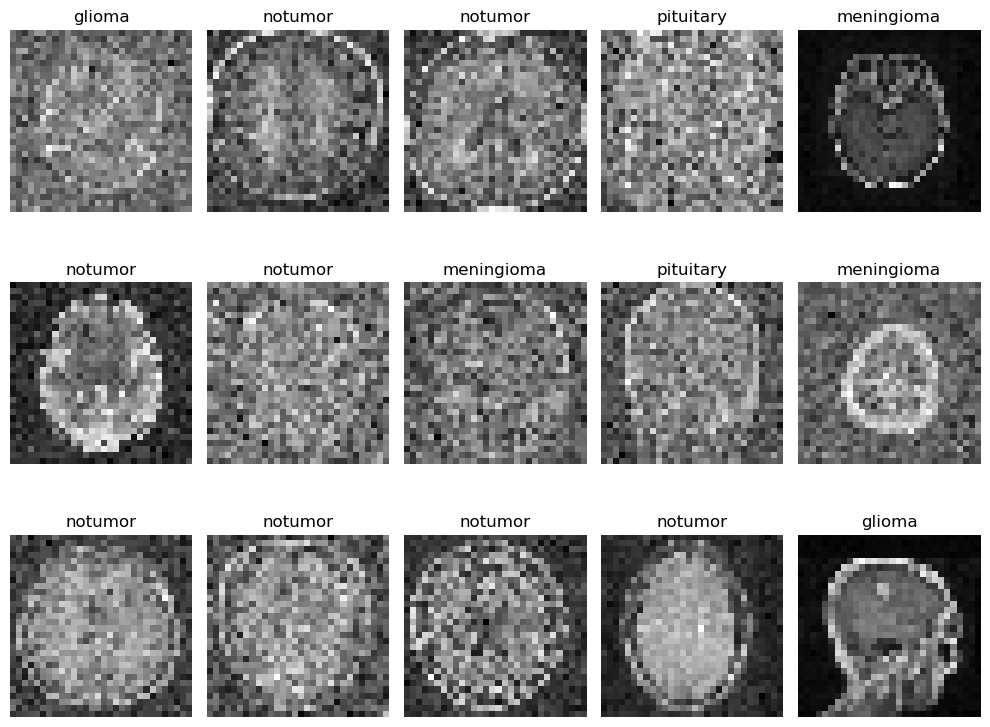

In [91]:
from tensorflow.keras.utils import to_categorical

#Convert the target values using the TensorFlow's to_categorical function for one hot encoding
# one_hot_code_train = to_categorical(train_data.labels)
# one_hot_code_test = to_categorical(test_data.labels)

# Randomly select 15 samples from the dataset
import matplotlib.pyplot as plt

def get_image_n_label(index):
    batch_index = index // train_data.batch_size
    item_index = index % train_data.batch_size
    
    images, labels = train_data.__getitem__(batch_index)
    return images[item_index], labels[item_index]

def get_class_keys():
    class_keys = [""] * len(train_data.classes)

    for key, value in train_data.class_indices.items():
        class_keys[value] = key
        
    return class_keys
    
try:
    # Randomly generate 15 integers within the train_data index range
    indices = np.random.choice(train_data.samples, 15, replace=False)
    
    # Select 15 images with labels per the random indicies
    random_images, random_labels = zip(*[get_image_n_label(i) for i in indices])
except Exception as e:
    print(f"Error randomly selecting 15 images: {e}")
    raise

try:
    fig, axes = plt.subplots(3, 5, figsize=(10, 8))

    # Flatten the axes for easy access
    axes = axes.flatten()
    
    labels = get_class_keys()
    
    # Display each image with its label
    for i, axe in enumerate(axes):
        image = random_images[i].squeeze()  # Remove channel axis if grayscale
        label_index = np.argmax(random_labels[i])  # Convert one-hot-coding to class index
        label = labels[label_index]
        
        axe.imshow(image, cmap='gray')  # Use grayscale
        axe.set_title(label)
        axe.axis('off')  # Hide axis

    # Adjust layout
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error plotting images: {e}")
    raise



Create a bar plot to visualize the class label distribution of the dataset. (Hint: this bar plot reveals how many samples the dataset has for each class)

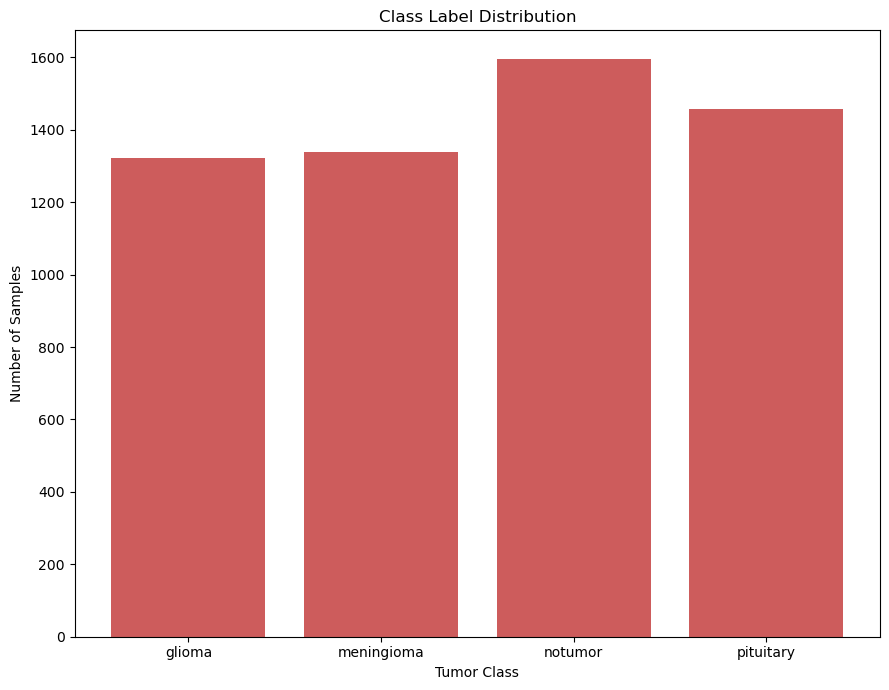

In [118]:
try:
    class_labels = get_class_keys()
    
    # Count the number of samples per class
    class_counts = np.bincount(train_data.classes)
    
    plt.figure(figsize=(9, 7))
    plt.bar(range(len(class_counts)), class_counts, color='indianred')

    # Add class names as the x axis label
    plt.xticks(range(len(class_counts)), [class_labels[i] for i in range(len(class_counts))])
    plt.xlabel('Tumor Class')
    plt.ylabel('Number of Samples')
    plt.title('Class Label Distribution')

    plt.tight_layout() # Make sure the plot won't overlap
    plt.show()

except Exception as e:
    print(f"Error plotting images: {e}")
    raise

# 4. Train and Evaluation functions

# 5. Model training

# 6. Model evaluation